In [44]:
import matplotlib.pyplot as plt
import numpy as np
from evaluate.utils import *
import random

DEFAULT_RESULT_SAVING_PATH = 'files/unified/results/'
data1 = read_json(DEFAULT_RESULT_SAVING_PATH + 'supervised.json')
datalist = read_json(DEFAULT_DATASET_INDEXING_PATH + 'supervised_datasets.json')
keys = ['Default', 'Ablation_aug', 'Ablation_meta', 'Ablation_aug_meta', 'TabLLM', 'XGBoost', 'MLP', 'FT-Trans', 'TabNet']
actual_names = ['UniPredict-heavy', 'UniPredict-heavy-aug', 'UniPredict-light', 'UniPredict-light-aug', 'TabLLM', 'XGBoost', 'MLP', 'FT-Transformer', 'TabNet']

color_palette = ['#5FAD56', '#FDCA40', '#DF2935', '#FF7F11', '#480355', '#474747', '#9A348E', '#3185FC', '#0D0628']
filler_palette = ['#BFDFBC', '#FEEAB2', '#F2AAAF', '#FFC999', '#DF5CF9', '#B6B6B6', '#E0A3D9', '#ADCEFE', '#795DE7']


In [45]:
def find_rank(accs):
    ref = accs.copy()
    ref.sort()
    ref = np.flip(ref, axis=1)
    for i in range(len(accs)):
        ref_arr = ref[i]
        cand_arr = accs[i]
        for j in range(len(cand_arr)):
            cand_arr[j] = np.where(ref_arr==cand_arr[j])[0][0]
    return accs + 1

### Plot figure 1: supervised dataset overview

In [46]:
all_data = []
for name in datalist:
    dict1 = data1[name] if name in data1.keys() else {}
    values = [dict1[item] if item in dict1.keys() else 0 for item in keys]
    all_data.append(values)
data = np.array(all_data)
data_avg = np.average(data, axis=0)
ranks = find_rank(data.copy())
rank_avg = np.average(ranks, axis=0)

In [47]:
print(data_avg)
print(rank_avg)
print(keys)

[0.72132783 0.68620419 0.72979752 0.57502645 0.47526158 0.69554767
 0.41235892 0.64129652 0.37524395]
[2.85798817 4.26627219 2.77514793 6.17751479 6.89349112 3.15976331
 6.29585799 3.92307692 6.78698225]
['Default', 'Ablation_aug', 'Ablation_meta', 'Ablation_aug_meta', 'TabLLM', 'XGBoost', 'MLP', 'FT-Trans', 'TabNet']


In [48]:
selected_datasets = [0, 2, 4, 5, 6, 7, 8]
selected_data = data[:, selected_datasets]
colors = [color_palette[i] for i in selected_datasets]
fillers = [filler_palette[i] for i in selected_datasets]
column_names = [actual_names[i] for i in selected_datasets]
selected_ranks = find_rank(selected_data.copy())

dict_keys(['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means'])


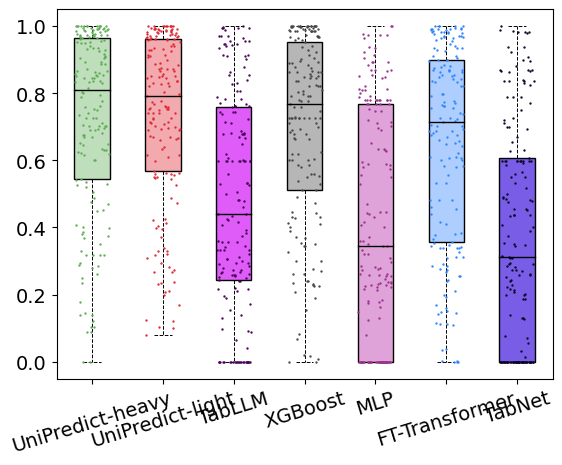

In [49]:
fig1 = plt.boxplot(selected_data, labels=column_names, patch_artist=True, )
for i in range(len(column_names)):
    for item in selected_data[:, i]:
        pos = i + 1 + random.uniform(-0.24, 0.24)
        plt.plot(pos, item, 'o', color = colors[i], markersize=0.7)

plt.xticks(rotation=17)
print(fig1.keys())
for patch, color in zip(fig1['boxes'], fillers):
    patch.set_facecolor(color)
    
for patch in fig1['medians']:
    patch._color = 'black'

for item in fig1['whiskers']:
    item.set(
        linewidth=0.7,
        linestyle='--'
    )

for item in fig1['caps']:
    item.set(
        linewidth=0.7,
        linestyle='--'
    )

for item in fig1['fliers']:
    item.set(
        markersize=0
    )
fig1 = plt.gcf()
plt.show()
fig1.savefig("files/unified/figures/Fig3a.pdf", format="pdf", bbox_inches='tight', pad_inches = 0.2)

0.81
0.7903225806451613
0.44029850746268656
0.7678571428571429
0.3448275862068966
0.7142857142857143
0.3111111111111111


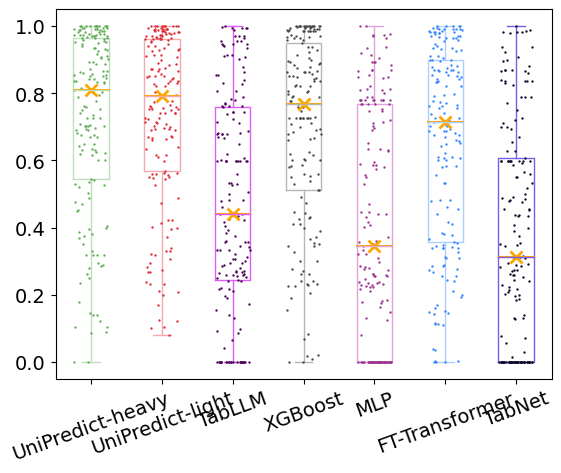

In [50]:
# plt.figure(figsize=(8, 8), dpi=200)
fig2 = plt.boxplot(selected_data, labels=column_names)
avg = np.median(selected_data, axis=0)

plt.xticks(rotation=20)


for patch, color in zip(fig2['whiskers'], [item for item in fillers for _ in range(2)]):
    patch.set(
        color=color,
        linewidth = 1
    )
for patch, color in zip(fig2['caps'], [item for item in fillers for _ in range(2)]):
    patch.set(
        color=color,
        linewidth = 1
    )
for patch, color in zip(fig2['medians'], fillers):
    patch.set(
        color=color,
        linewidth = 1
    )
for patch, color in zip(fig2['fliers'], [item for item in fillers for _ in range(2)]):
    patch.set(
        color=color,
        linewidth = 1
    )
for patch, color in zip(fig2['boxes'], fillers):
    patch.set(
        color=color,
        linewidth = 1
    )
for i in range(len(column_names)):
    for item in selected_data[:, i]:
        pos = i + 1 + random.uniform(-0.24, 0.24)
        plt.plot(pos, item, 'o', color = colors[i], markersize=0.7)
        

for i in range(len(column_names)):
    print(avg[i])
    x = [i+1-0.24, i+1+0.25]
    y = [avg[i], avg[i]]
    plt.plot(x, y, color = 'orange', linewidth=1.5)
    plt.plot(i+1, avg[i], 'x', color = 'orange', markersize=8, markeredgewidth=2)
    
plt.show()

dict_keys(['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means'])


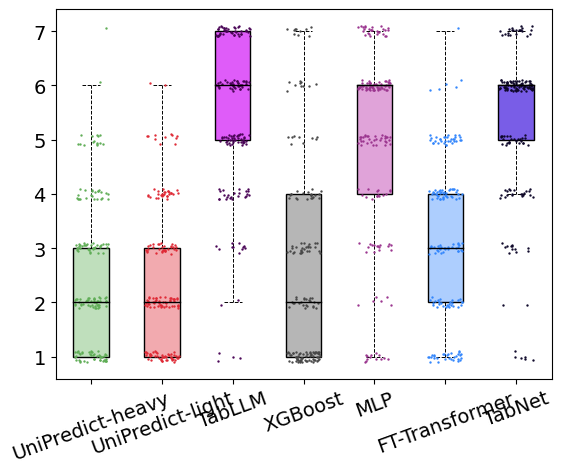

In [51]:
fig3 = plt.boxplot(selected_ranks, labels=column_names, patch_artist=True, )
for i in range(len(column_names)):
    for item in selected_ranks[:, i]:
        xpos = i + 1 + random.uniform(-0.24, 0.24)
        ypos = item + random.uniform(-0.1, 0.1)
        plt.plot(xpos, ypos, 'o', color = colors[i], markersize=0.7)
plt.xticks(rotation=20)
print(fig3.keys())
for patch, color in zip(fig3['boxes'], fillers):
    patch.set_facecolor(color)  
   
for patch in fig3['medians']:
    patch._color = 'black'
    
for item in fig3['whiskers']:
    item.set(
        linewidth=0.7,
        linestyle='--'
    )

for item in fig3['caps']:
    item.set(
        linewidth=0.7,
        linestyle='--'
    )

for item in fig3['fliers']:
    item.set(
        markersize=0
    )


fig3 = plt.gcf()
fig3.savefig("files/unified/figures/Fig3b.pdf", format="pdf", bbox_inches='tight', pad_inches = 0.2)

plt.show()

2.562130177514793
2.4911242603550297
5.378698224852071
2.727810650887574
4.982248520710059
3.2189349112426036
5.289940828402367


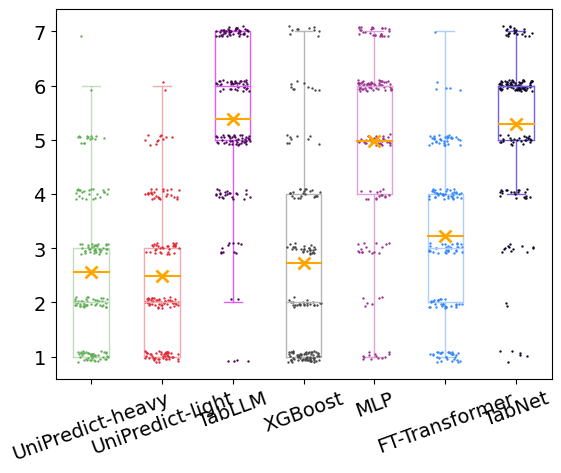

In [52]:
fig2 = plt.boxplot(selected_ranks, labels=column_names)
avg = np.average(selected_ranks, axis=0)

plt.xticks(rotation=20)

for patch, color in zip(fig2['whiskers'], [item for item in fillers for _ in range(2)]):
    patch.set(
        color=color,
        linewidth = 1
    )
for patch, color in zip(fig2['caps'], [item for item in fillers for _ in range(2)]):
    patch.set(
        color=color,
        linewidth = 1
    )
for patch, color in zip(fig2['medians'], fillers):
    patch.set(
        color=color,
        linewidth = 1
    )
for patch, color in zip(fig2['fliers'], [item for item in fillers for _ in range(2)]):
    patch.set(
        color=color,
        markersize = 0
    )
for patch, color in zip(fig2['boxes'], fillers):
    patch.set(
        color=color,
        linewidth = 1
    )
for i in range(len(column_names)):
    for item in selected_ranks[:, i]:
        xpos = i + 1 + random.uniform(-0.24, 0.24)
        ypos = item + random.uniform(-0.1, 0.1)
        plt.plot(xpos, ypos, 'o', color = colors[i], markersize=0.7)

for i in range(len(column_names)):
    print(avg[i])
    x = [i+1-0.24, i+1+0.25]
    y = [avg[i], avg[i]]
    plt.plot(x, y, color = 'orange', linewidth=1.5)
    plt.plot(i+1, avg[i], 'x', color = 'orange', markersize=8, markeredgewidth=2)
    
plt.show()

In [53]:
for i in range(len(all_data)):
    dataset_name = datalist[i]
    row = all_data[i]
    row_str = dataset_name + ' '
    for item in row:
        row_str += '& {:.3f} '.format(item)
    row_str += '\\\\'
    print(row_str)


arnavsmayan-netflix-userbase-dataset & 0.632 & 0.556 & 0.616 & 0.596 & 0.332 & 0.600 & 0.372 & 0.608 & 0.564 \\
deependraverma13-diabetes-healthcare-comprehensive-dataset & 0.701 & 0.649 & 0.740 & 0.688 & 0.597 & 0.727 & 0.779 & 0.701 & 0.597 \\
bhanupratapbiswas-uber-data-analysis & 0.940 & 0.948 & 0.940 & 0.845 & 0.914 & 0.009 & 0.914 & 0.897 & 0.922 \\
swathiunnikrishnan-amazon-consumer-behaviour-dataset & 0.262 & 0.279 & 0.295 & 0.246 & 0.000 & 0.328 & 0.279 & 0.410 & 0.213 \\
hemanthhari-psycological-effects-of-covid & 0.763 & 0.737 & 0.822 & 0.356 & 0.000 & 0.805 & 0.000 & 0.153 & 0.000 \\
arslanr369-bitcoin-price-2014-2023 & 0.994 & 0.975 & 0.988 & 0.418 & 0.947 & 1.000 & 0.235 & 0.994 & 0.551 \\
saloni1712-chatgpt-app-reviews & 0.948 & 0.517 & 0.957 & 0.483 & 0.000 & 0.400 & 0.322 & 0.483 & 0.483 \\
naveenkumar20bps1137-predict-students-dropout-and-academic-success & 0.616 & 0.510 & 0.616 & 0.415 & 0.000 & 0.777 & 0.628 & 0.738 & 0.628 \\
sanjanchaudhari-user-behavior-on-instag

### Plot Figure 2: few-shot modelling

In [54]:
selected_datasets = [0, 2, 4, 5, 6, 7, 8]
print(keys)
few_shot_datalist = read_json(DEFAULT_DATASET_INDEXING_PATH + 'few_shot_datasets.json')
data3 = read_json(DEFAULT_RESULT_SAVING_PATH + 'few_shot.json')

x_coord = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
colors = [color_palette[i] for i in selected_datasets]
fillers = [filler_palette[i] for i in selected_datasets]



['Default', 'Ablation_aug', 'Ablation_meta', 'Ablation_aug_meta', 'TabLLM', 'XGBoost', 'MLP', 'FT-Trans', 'TabNet']


In [55]:
all_few_shot_data = []
for name in few_shot_datalist:
    dict1 = data3[name] if name in data3.keys() else {}
    few_shot_at_ratio = []
    for i in range(1, 10):
        ratio = str(i/10)
        baseline_ratio = str((10-i)/10)
        dict1_at_ratio = dict1[ratio] if ratio in dict1.keys() else {}
        values = [dict1_at_ratio[item] if item in dict1_at_ratio.keys() else 0 for item in keys]
        few_shot_at_ratio.append(values)
    all_few_shot_data.append(few_shot_at_ratio)
    
few_shot = np.array(all_few_shot_data)
selected_few_shot_data = few_shot[:, :, selected_datasets]
few_shot = selected_few_shot_data.transpose(1, 0, 2)

acc_tracks = []
for i in range(9):
    few_shot_at_ratio = few_shot[i]
    acc_tracks.append(np.average(few_shot_at_ratio, axis=0))
acc_tracks = np.array(acc_tracks)
acc_tracks = acc_tracks.transpose(1, 0)
acc_tracks[:, 0]


array([0.38384696, 0.38912884, 0.29525915, 0.17590885, 0.30331157,
       0.29123308, 0.24827393])

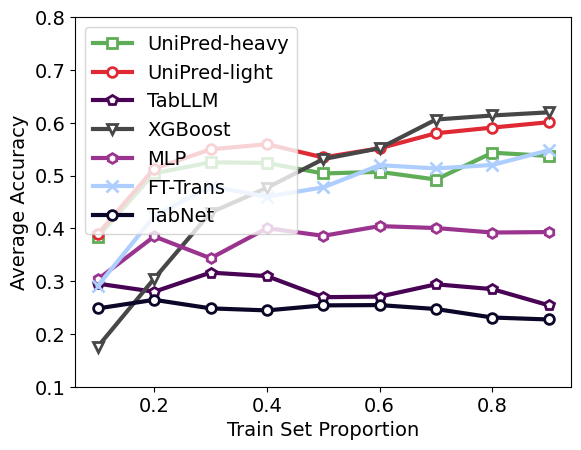

In [56]:
plt.ylim(0.1, 0.8)

plt.plot(
    x_coord,
    acc_tracks[0],
    '-s',
    label='UniPred-heavy',
    color = colors[0],
    linewidth=3,
    markersize=7,
    markerfacecolor='white',
    markeredgewidth=2
    )
plt.plot(
    x_coord,
    acc_tracks[1],
    '-o',
    label='UniPred-light',
    color = colors[1],
    linewidth=3,
    markersize=7,
    markerfacecolor='white',
    markeredgewidth=2
    )
plt.plot(
    x_coord,
    acc_tracks[2],
    '-p',
    label='TabLLM',
    color = colors[2],
    linewidth=3,
    markersize=7,
    markerfacecolor='white',
    markeredgewidth=2
    )
plt.plot(
    x_coord,
    acc_tracks[3],
    '-v',
    label='XGBoost',
    color = colors[3],
    linewidth=3,
    markersize=7,
    markerfacecolor='white',
    markeredgewidth=2
    )
plt.plot(
    x_coord,
    acc_tracks[4],
    '-h',
    label='MLP',
    color = colors[4],
    linewidth=3,
    markersize=7,
    markerfacecolor='white',
    markeredgewidth=2
    )
plt.plot(
    x_coord,
    acc_tracks[5],
    '-x',
    label='FT-Trans',
    color = fillers[5],
    linewidth=3,
    markersize=9,
    markerfacecolor='white',
    markeredgewidth=2
    )
plt.plot(
    x_coord,
    acc_tracks[6],
    '-o',
    label='TabNet',
    color = colors[6],
    linewidth=3,
    markersize=7,
    markerfacecolor='white',
    markeredgewidth=2
    )

# plt.plot(
#     x_coord,
#     acc_tracks[7],
#     '-o',
#     label='abl_meta_aug',
#     color = colors[7],
#     linewidth=3,
#     markersize=7,
#     markerfacecolor='white',
#     markeredgewidth=2
#     )

plt.xlabel('Train Set Proportion')
plt.ylabel('Average Accuracy')
plt.legend()

fig = plt.gcf()
fig.savefig("files/unified/figures/Fig4a.pdf", format="pdf", bbox_inches='tight', pad_inches = 0.2)
plt.show()


In [57]:
acc_tracks = []
for i in range(9):
    few_shot_at_ratio = few_shot[i]
    rank = find_rank(few_shot_at_ratio)
    acc_tracks.append(np.average(rank, axis=0))
acc_tracks = np.array(acc_tracks)
acc_tracks = acc_tracks.transpose(1, 0)
acc_tracks[:, -1]

array([2.69354839, 2.41935484, 4.61290323, 2.11290323, 3.56451613,
       2.35483871, 4.56451613])

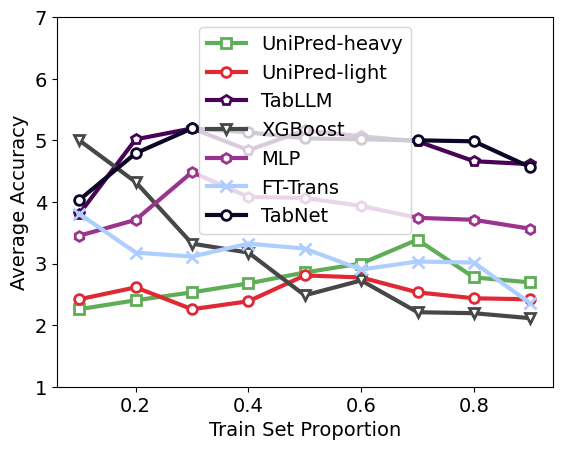

In [58]:
# plt.figure()
plt.ylim(1, 7)
plt.plot(
    x_coord,
    acc_tracks[0],
    '-s',
    label='UniPred-heavy',
    color = colors[0],
    linewidth=3,
    markersize=7,
    markerfacecolor='white',
    markeredgewidth=2
    )
plt.plot(
    x_coord,
    acc_tracks[1],
    '-o',
    label='UniPred-light',
    color = colors[1],
    linewidth=3,
    markersize=7,
    markerfacecolor='white',
    markeredgewidth=2
    )
plt.plot(
    x_coord,
    acc_tracks[2],
    '-p',
    label='TabLLM',
    color = colors[2],
    linewidth=3,
    markersize=7,
    markerfacecolor='white',
    markeredgewidth=2
    )
plt.plot(
    x_coord,
    acc_tracks[3],
    '-v',
    label='XGBoost',
    color = colors[3],
    linewidth=3,
    markersize=7,
    markerfacecolor='white',
    markeredgewidth=2
    )
plt.plot(
    x_coord,
    acc_tracks[4],
    '-h',
    label='MLP',
    color = colors[4],
    linewidth=3,
    markersize=7,
    markerfacecolor='white',
    markeredgewidth=2
    )
plt.plot(
    x_coord,
    acc_tracks[5],
    '-x',
    label='FT-Trans',
    color = fillers[5],
    linewidth=3,
    markersize=9,
    markerfacecolor='white',
    markeredgewidth=2
    )
plt.plot(
    x_coord,
    acc_tracks[6],
    '-o',
    label='TabNet',
    color = colors[6],
    linewidth=3,
    markersize=7,
    markerfacecolor='white',
    markeredgewidth=2
    )
# plt.plot(
#     x_coord,
#     acc_tracks[7],
#     '-o',
#     label='abl_meta_aug',
#     color = colors[7],
#     linewidth=3,
#     markersize=7,
#     markerfacecolor='white',
#     markeredgewidth=2
#     )

plt.xlabel('Train Set Proportion')
plt.ylabel('Average Accuracy')
plt.legend()
fig = plt.gcf()
fig.savefig("files/unified/figures/Fig4b.pdf", format="pdf", bbox_inches='tight', pad_inches = 0.2)
plt.show()





### Ablation


In [59]:
selected_datasets = [0, 1, 2, 3]
selected_data = data[:, selected_datasets]
colors = [color_palette[i] for i in selected_datasets]
fillers = [filler_palette[i] for i in selected_datasets]
column_names = [actual_names[i] for i in selected_datasets]
selected_ranks = find_rank(selected_data.copy())

all_few_shot_data = []
for name in few_shot_datalist:
    dict1 = data3[name] if name in data3.keys() else {}
    few_shot_at_ratio = []
    for i in range(1, 10):
        ratio = str(i/10)
        baseline_ratio = str((10-i)/10)
        dict1_at_ratio = dict1[ratio] if ratio in dict1.keys() else {}
        values = [dict1_at_ratio[item] if item in dict1_at_ratio.keys() else 0 for item in keys]
        few_shot_at_ratio.append(values)
    all_few_shot_data.append(few_shot_at_ratio)
    
few_shot = np.array(all_few_shot_data)
selected_few_shot_data = few_shot[:, :, selected_datasets]
few_shot = selected_few_shot_data.transpose(1, 0, 2)

In [60]:
few_shot_low_resource = few_shot[2]
few_shot_high_resource = few_shot[7]

In [61]:
print(np.average(selected_data, axis=0))
print(np.median(selected_data, axis=0))
print(np.average(few_shot_low_resource, axis=0))
print(np.median(few_shot_low_resource, axis=0))
print(np.average(few_shot_high_resource, axis=0))
print(np.median(few_shot_high_resource, axis=0))

[0.72132783 0.68620419 0.72979752 0.57502645]
[0.81       0.74593496 0.79032258 0.58955224]
[0.52513437 0.48300251 0.54959682 0.34884222]
[0.5212766  0.47413793 0.57569558 0.28949372]
[0.54320619 0.54573332 0.59079601 0.32161525]
[0.56349206 0.57142857 0.64583333 0.33333333]


### Analyzing ablation model without metadata information

In [62]:
selected_datasets = [0, 2, 4, 5, 6, 7, 8]
selected_data = data[:, selected_datasets]
selected_ranks = find_rank(selected_data.copy())


\# of columns COL
BAD FEATURE VALUE: NV
confusing column values: CV
bad metadata quality: META

suraj520-dairy-goods-sales-dataset: Col (23)

yasserh-wine-quality-dataset: NV

thedevastator-higher-education-predictors-of-student-retention COL(34), NV

kumargh-pimaindiansdiabetescsv META

sanjanchaudhari-bankloan CV, NV

rkiattisak-student-performance-in-mathematics OTH

surajjha101-top-youtube-channels-data NV

ybifoundation-food-app-business NV, Col (27), CV



In [63]:
back = selected_ranks > 5
back = back[:, 0]
back = np.where(back)
for i in back[0]:
    print(datalist[i])

heavy_counter = {
    'COL': 3,
    'FV': 5,
    'META': 3,
    'OTH': 1
}

thedevastator-higher-education-predictors-of-student-retention
ybifoundation-food-app-business


suraj520-dairy-goods-sales-dataset: Col (23)
harishkumardatalab-medical-insurance-price-prediction OTHER
uciml-mushroom-classification NV
shreyanshverma27-imdb-horror-chilling-movie-dataset other
atharvaingle-crop-recommendation-dataset NV
larsen0966-student-performance-data-set COL 33, NV
receplyasolu-6k-weather-labeled-spotify-songs NV
mahnazarjmand-bank-personal-loan NV
siddharthss-crop-recommendation-dataset NV
azminetoushikwasi--lionel-messi-all-club-goals NV

In [64]:

back = selected_ranks > 5
back = back[:, 1]
back = np.where(back)
for i in back[0]:
    print(datalist[i])
light_counter = {
    'COL': 2,
    'FV': 7,
    'META': 0,
    'OTH': 2
}

suraj520-dairy-goods-sales-dataset
uciml-mushroom-classification


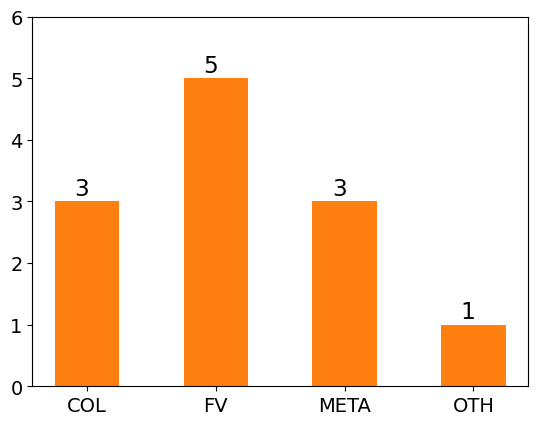

In [65]:
def draw_pie(dct, item):
    plt.rcParams.update({'font.size': 14})
    keys = [key for key in dct.keys()]
    vals = [dct[key] for key in keys]
    plt.ylim(0, max(vals) + 1)
    plt.bar(keys, vals, color=color_palette[3], width=0.5, )
    for index, value in enumerate(vals):
        plt.text(index-0.05 - len(str(round(value, 3))) * 0.05, value+0.1, str(round(value, 3)), fontsize='large')
    fig = plt.gcf()
    fig.savefig(f"files/unified/figures/Fig5{item}.pdf", format="pdf", bbox_inches='tight', pad_inches = 0.1)
draw_pie(heavy_counter, 'b')

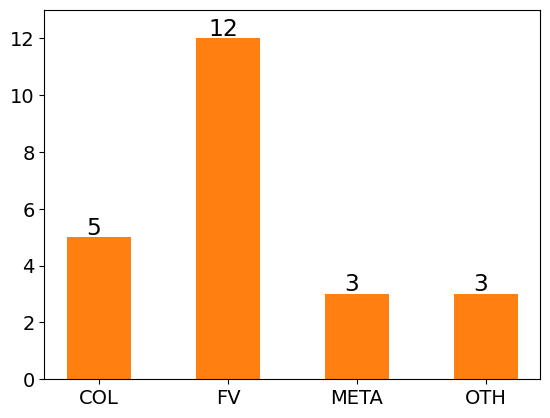

In [66]:
all_counter = {
    'COL': 5,
    'FV': 12,
    'META': 3,
    'OTH': 3
}
draw_pie(all_counter, 'a')

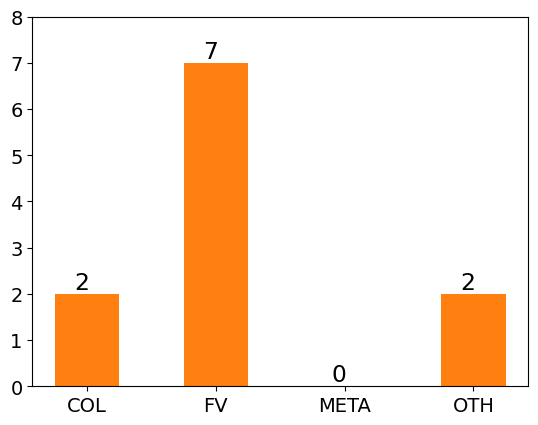

In [67]:
draw_pie(light_counter, 'c')

### Appendix

In [68]:
all_data = []
for name in datalist:
    dict1 = data1[name] if name in data1.keys() else {}
    values = [dict1[item] if item in dict1.keys() else 0 for item in keys]
    all_data.append(values)
data = np.array(all_data)
data_avg = np.average(data, axis=0)
ranks = find_rank(data.copy())
rank_avg = np.average(ranks, axis=0)

selected_datasets = [0, 2, 4, 5, 6, 7, 8]
print(keys)
few_shot_datalist = read_json(DEFAULT_DATASET_INDEXING_PATH + 'few_shot_datasets.json')
data3 = read_json(DEFAULT_RESULT_SAVING_PATH + 'few_shot.json')

x_coord = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
colors = [color_palette[i] for i in selected_datasets]
fillers = [filler_palette[i] for i in selected_datasets]
all_few_shot_data = []
for name in few_shot_datalist:
    dict1 = data3[name] if name in data3.keys() else {}
    few_shot_at_ratio = []
    for i in range(1, 10):
        ratio = str(i/10)
        baseline_ratio = str((10-i)/10)
        dict1_at_ratio = dict1[ratio] if ratio in dict1.keys() else {}
        values = [dict1_at_ratio[item] if item in dict1_at_ratio.keys() else 0 for item in keys]
        few_shot_at_ratio.append(values)
    all_few_shot_data.append(few_shot_at_ratio)
    
few_shot = np.array(all_few_shot_data)
selected_few_shot_data = few_shot[:, :, selected_datasets]
few_shot = selected_few_shot_data.transpose(1, 0, 2)
column_names = [actual_names[i] for i in selected_datasets]



['Default', 'Ablation_aug', 'Ablation_meta', 'Ablation_aug_meta', 'TabLLM', 'XGBoost', 'MLP', 'FT-Trans', 'TabNet']


In [69]:
selected_data = few_shot[0]
selected_data

array([[0.18181818, 0.18181818, 0.18181818, 0.        , 0.        ,
        0.        , 0.        ],
       [0.56862745, 0.56862745, 0.25490196, 0.23529412, 0.23529412,
        0.43137255, 0.19607843],
       [0.25      , 0.25      , 0.25      , 0.        , 0.25      ,
        0.        , 0.25      ],
       [0.69230769, 0.66666667, 0.64102564, 0.        , 0.64102564,
        0.79487179, 0.25641026],
       [0.31578947, 0.43421053, 0.42105263, 0.27631579, 0.59210526,
        0.60526316, 0.26315789],
       [0.43243243, 0.48648649, 0.43243243, 0.        , 0.37837838,
        0.43243243, 0.32432432],
       [0.68115942, 0.68115942, 0.5942029 , 0.71014493, 0.        ,
        0.28985507, 0.        ],
       [0.47777778, 0.35555556, 0.2       , 0.        , 0.45555556,
        0.34444444, 0.25555556],
       [0.47252747, 0.42857143, 0.38461538, 0.        , 0.2967033 ,
        0.1978022 , 0.15384615],
       [0.17647059, 0.17647059, 0.17647059, 0.17647059, 0.        ,
        0.        , 0. 

dict_keys(['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means'])


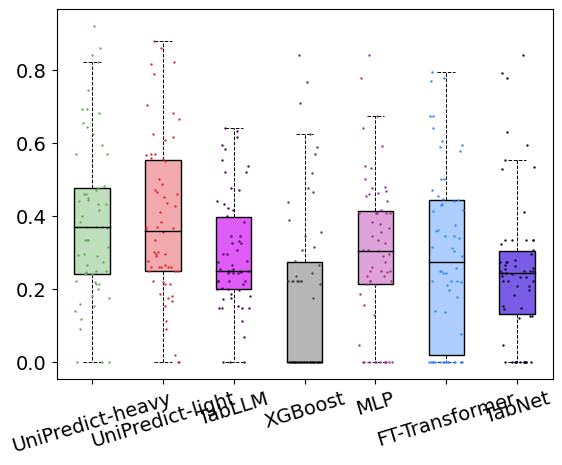

In [70]:
fig1 = plt.boxplot(selected_data, labels=column_names, patch_artist=True, )
for i in range(len(column_names)):
    for item in selected_data[:, i]:
        pos = i + 1 + random.uniform(-0.24, 0.24)
        plt.plot(pos, item, 'o', color = colors[i], markersize=0.7)
plt.xticks(rotation=17)
print(fig1.keys())
for patch, color in zip(fig1['boxes'], fillers):
    patch.set_facecolor(color)  
   
for patch in fig1['medians']:
    patch._color = 'black'

for item in fig1['whiskers']:
    item.set(
        linewidth=0.7,
        linestyle='--'
    )

for item in fig1['caps']:
    item.set(
        linewidth=0.7,
        linestyle='--'
    )
for item in fig1['fliers']:
    item.set(
        markersize=0
    )
fig1 = plt.gcf()
plt.show()
fig1.savefig("files/unified/figures/Fig6a.pdf", format="pdf", bbox_inches='tight', pad_inches = 0.2)

dict_keys(['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means'])


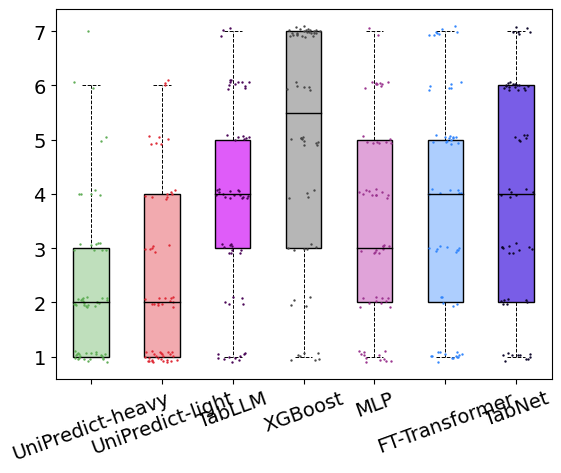

In [71]:
selected_ranks = find_rank(selected_data.copy())
fig3 = plt.boxplot(selected_ranks, labels=column_names, patch_artist=True, )
for i in range(len(column_names)):
    for item in selected_ranks[:, i]:
        xpos = i + 1 + random.uniform(-0.24, 0.24)
        ypos = item + random.uniform(-0.1, 0.1)
        plt.plot(xpos, ypos, 'o', color = colors[i], markersize=0.7)
plt.xticks(rotation=20)
print(fig3.keys())
for patch, color in zip(fig3['boxes'], fillers):
    patch.set_facecolor(color)  
   
for patch in fig3['medians']:
    patch._color = 'black'
    
for item in fig3['whiskers']:
    item.set(
        linewidth=0.7,
        linestyle='--'
    )

for item in fig3['caps']:
    item.set(
        linewidth=0.7,
        linestyle='--'
    )

for item in fig3['fliers']:
    item.set(
        markersize=0
    )


fig3 = plt.gcf()
fig3.savefig("files/unified/figures/Fig6b.pdf", format="pdf", bbox_inches='tight', pad_inches = 0.2)

plt.show()